# Ratio of total CO$_2$-eq / CO$_2$ and its sensitivity to future aviation scenarios

In [1]:
# Import librairies
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Climate functions
from aerocm.metrics.aviation_climate_metrics_calculation import AviationClimateMetricsCalculation

In [2]:
# --- Set parameters ---

## Climate model
climate_model = "FaIR"
start_year = 1940

## Metrics
time_horizon = list(range(15,110,5))

## Species
species_profile = 'pulse'
profile_start_year = 2020
species_list = ["Contrails", "NOx - ST O3 increase", "NOx - CH4 decrease and induced", "H2O", "Soot", "Sulfur"]

In [3]:
# --- Calculate metrics ---

results = AviationClimateMetricsCalculation(
    climate_model,
    start_year,
    time_horizon,
    species_profile,
    profile_start_year,
    species_list   
).run()

In [4]:
# --- Store data ---

gwp_erf = np.zeros((len(time_horizon), 6))
gtp = np.zeros((len(time_horizon), 6))
for k in range(0, len(time_horizon)):
    i = 0
    for specie in species_list:
        metrics = results["Relative metrics"][k][specie]
        gwp_erf[k, i] = metrics["gwp_erf"]
        gtp[k, i] = metrics["gtp"]
        i += 1

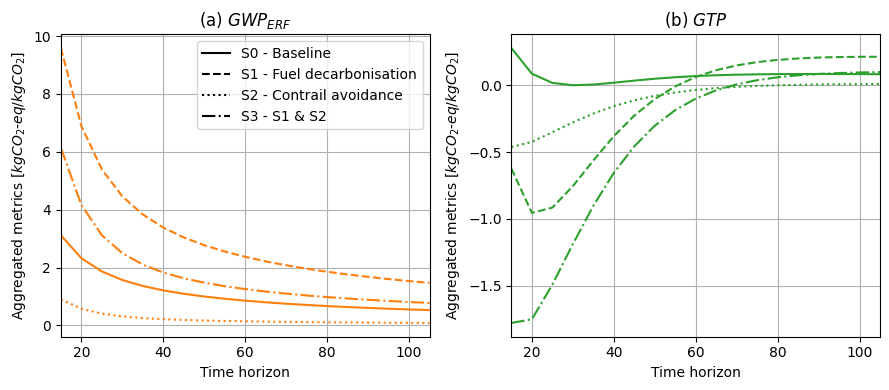

In [5]:
# --- Plot ---

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# Ratio based on 2018 data
ratio_contrails = 61.3/1033.7 # Million km / MtCO2
ratio_nox = 1.4*46/14/1033.7 # MtNOx / MtCO2
ratio_h2o = 382.55/1033.7 # MtH2O / MtCO2
ratio_soot = 0.0093/1033.7 # MtBC / MtCO2
ratio_sulfur = 0.37/1033.7 # MtSOx / MtCO2

# S1 - Fuel decarbonisation (including effect on contrails with sqrt(0.2))
ratio_contrails_1 = 0.447*61.3/(1033.7*0.2) # Million km / MtCO2
ratio_nox_1 = 1.4*46/14/(1033.7*0.2) # MtNOx / MtCO2
ratio_h2o_1 = 382.55/(1033.7*0.2) # MtH2O / MtCO2
ratio_soot_1 = 0.2*0.0093/(1033.7*0.2) # MtBC / MtCO2
ratio_sulfur_1 = 0*0.37/(1033.7*0.2) # MtkSOx / MtCO2

# S2 - Contrail avoidance
ratio_contrails_2 = (1-0.8)*61.3/(1033.7*1.02) # Million km / MtCO2
ratio_nox_2 = 1.4*46/14/1033.7 # MtNOx / MtCO2
ratio_h2o_2 = 382.55/1033.7 # MtH2O / MtCO2
ratio_soot_2 = 0.0093/1033.7 # MtBC / MtCO2
ratio_sulfur_2 = 0.37/1033.7 # MtSOx / MtCO2

# S3 - S1 & S2
ratio_contrails_3 = (1-0.8)*61.3/(1033.7*0.2*1.02) # Million km / MtCO2
ratio_nox_3 = 1.4*46/14/(1033.7*0.2) # MtNOx / MtCO2
ratio_h2o_3 = 382.55/(1033.7*0.2) # MtH2O / MtCO2
ratio_soot_3 = 0.2*0.0093/(1033.7*0.2) # MtBC / MtCO2
ratio_sulfur_3 = 0*0.37/(1033.7*0.2) # MtSOx / MtCO2

for i, ax in enumerate(axes.flat):
    if i == 0:
        x_axis = time_horizon
        ax.plot(x_axis, ratio_contrails*gwp_erf[:, i+0]+ratio_nox*(gwp_erf[:, i+2]+gwp_erf[:, i+1])+ratio_h2o*gwp_erf[:, i+3]+ratio_soot*gwp_erf[:, i+4]+ratio_sulfur*gwp_erf[:, i+5], label='S0 - Baseline', color='C1')
        ax.plot(x_axis, ratio_contrails_1*gwp_erf[:, i+0]+ratio_nox_1*(gwp_erf[:, i+2]+gwp_erf[:, i+1])+ratio_h2o_1*gwp_erf[:, i+3]+ratio_soot_1*gwp_erf[:, i+4]+ratio_sulfur_1*gwp_erf[:, i+5], label='S1 - Fuel decarbonisation', color='C1', linestyle="--")
        ax.plot(x_axis, ratio_contrails_2*gwp_erf[:, i+0]+ratio_nox_2*(gwp_erf[:, i+2]+gwp_erf[:, i+1])+ratio_h2o_2*gwp_erf[:, i+3]+ratio_soot_2*gwp_erf[:, i+4]+ratio_sulfur_2*gwp_erf[:, i+5], label='S2 - Contrail avoidance', color='C1', linestyle=":")
        ax.plot(x_axis, ratio_contrails_3*gwp_erf[:, i+0]+ratio_nox_3*(gwp_erf[:, i+2]+gwp_erf[:, i+1])+ratio_h2o_3*gwp_erf[:, i+3]+ratio_soot_3*gwp_erf[:, i+4]+ratio_sulfur_3*gwp_erf[:, i+5], label='S3 - S1 & S2', color='C1', linestyle="-.")
        legend = ax.legend() 
        for legline in legend.get_lines():
            legline.set_color("black")
        ax.set_ylabel(r'Aggregated metrics [$kgCO_2\text{-}eq/kgCO_2$]')
        ax.set_title(r'(a) $GWP_{ERF}$')
    elif i == 1:
        i = 0
        x_axis = time_horizon
        ax.plot(x_axis, ratio_contrails*gtp[:, i+0]+ratio_nox*(gtp[:, i+2]+gtp[:, i+1])+ratio_h2o*gtp[:, i+3]+ratio_soot*gtp[:, i+4]+ratio_sulfur*gtp[:, i+5], label='S0', color='C2')
        ax.plot(x_axis, ratio_contrails_1*gtp[:, i+0]+ratio_nox_1*(gtp[:, i+2]+gtp[:, i+1])+ratio_h2o_1*gtp[:, i+3]+ratio_soot_1*gtp[:, i+4]+ratio_sulfur_1*gtp[:, i+5], label='S1', color='C2', linestyle="--")
        ax.plot(x_axis, ratio_contrails_2*gtp[:, i+0]+ratio_nox_2*(gtp[:, i+2]+gtp[:, i+1])+ratio_h2o_2*gtp[:, i+3]+ratio_soot_2*gtp[:, i+4]+ratio_sulfur_2*gtp[:, i+5], label='S2', color='C2', linestyle=":")
        ax.plot(x_axis, ratio_contrails_3*gtp[:, i+0]+ratio_nox_3*(gtp[:, i+2]+gtp[:, i+1])+ratio_h2o_3*gtp[:, i+3]+ratio_soot_3*gtp[:, i+4]+ratio_sulfur_3*gtp[:, i+5], label='S3', color='C2', linestyle="-.")
        #ax.legend()
        ax.set_ylabel(r'Aggregated metrics [$kgCO_2\text{-}eq/kgCO_2$]')
        ax.set_title(r'(b) $GTP$')
    ax.set_xlim(min(time_horizon),max(time_horizon))
    ax.set_xlabel('Time horizon')
    ax.grid(True)
plt.tight_layout()
plt.savefig("figures/sensitivity_to_scenarios.pdf")
plt.show()

In [6]:
i = 0
ratio_contrails_3*gtp[:, i+0]+ratio_nox_3*(gtp[:, i+2]+gtp[:, i+1])+ratio_h2o_3*gtp[:, i+3]+ratio_soot_3*gtp[:, i+4]+ratio_sulfur_3*gtp[:, i+5]

array([-1.77910147, -1.75130063, -1.49206731, -1.18951504, -0.90290637,
       -0.65638681, -0.45753295, -0.30313426, -0.18660845, -0.10051243,
       -0.03821121,  0.00609647,  0.03723394,  0.05893043,  0.07386798,
        0.08398262,  0.09069667,  0.09501755,  0.09768337])